# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        # city_weather
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kismayo
Processing Record 2 of Set 1 | zeya
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | hazard
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | bratsk
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | sao miguel do araguaia
Processing Record 12 of Set 1 | maceio
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | kerikeri
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | srandakan
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | ust-nera
Processin

In [7]:
print(city_weather)

{'coord': {'lon': -39.2208, 'lat': -17.3411}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.82, 'feels_like': 74.23, 'temp_min': 72.82, 'temp_max': 72.82, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.14, 'deg': 142, 'gust': 14.54}, 'clouds': {'all': 100}, 'dt': 1693143981, 'sys': {'country': 'BR', 'sunrise': 1693126079, 'sunset': 1693168168}, 'timezone': -10800, 'id': 3452483, 'name': 'Prado', 'cod': 200}


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kismayo,-0.3582,-0.3582,80.10,77,22,17.74,SO,1693143757
1,zeya,53.7500,53.7500,53.22,63,96,3.22,RU,1693143758
2,hithadhoo,-0.6000,-0.6000,83.14,72,95,4.72,MV,1693143758
3,hazard,37.2495,37.2495,76.69,87,94,5.88,US,1693143758
4,grytviken,-54.2811,-54.2811,27.03,85,100,11.25,GS,1693143759


In [10]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kismayo,-0.3582,-0.3582,80.10,77,22,17.74,SO,1693143757
1,zeya,53.7500,53.7500,53.22,63,96,3.22,RU,1693143758
2,hithadhoo,-0.6000,-0.6000,83.14,72,95,4.72,MV,1693143758
3,hazard,37.2495,37.2495,76.69,87,94,5.88,US,1693143758
4,grytviken,-54.2811,-54.2811,27.03,85,100,11.25,GS,1693143759
...,...,...,...,...,...,...,...,...,...
576,korla,41.7597,41.7597,86.85,13,99,11.99,CN,1693143908
577,vadso,70.0744,70.0744,55.56,71,100,8.05,NO,1693143979
578,noosa heads,-26.3833,-26.3833,62.11,76,0,10.69,AU,1693143980
579,nianzishan,47.5167,47.5167,59.63,70,8,1.05,CN,1693143980


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kismayo,-0.3582,-0.3582,80.10,77,22,17.74,SO,1693143757
1,zeya,53.7500,53.7500,53.22,63,96,3.22,RU,1693143758
2,hithadhoo,-0.6000,-0.6000,83.14,72,95,4.72,MV,1693143758
3,hazard,37.2495,37.2495,76.69,87,94,5.88,US,1693143758
4,grytviken,-54.2811,-54.2811,27.03,85,100,11.25,GS,1693143759


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

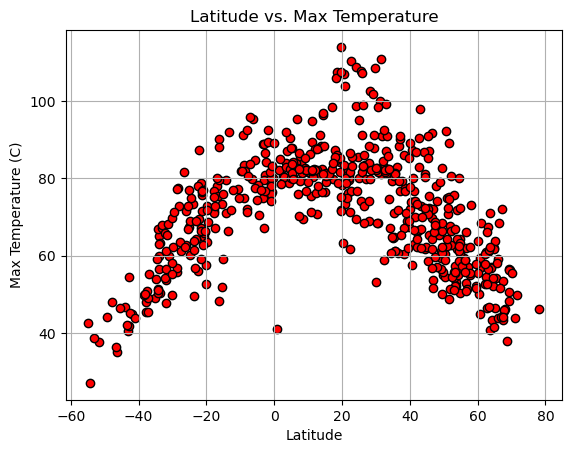

In [14]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature=city_data_df['Max Temp']
plt.scatter(latitude,temperature,facecolor='red', edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.show

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

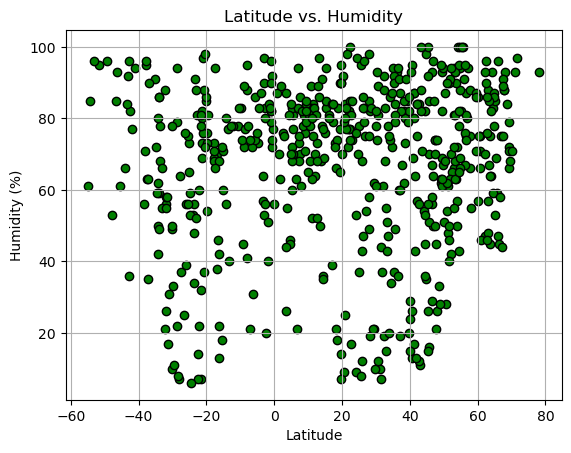

In [15]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity=city_data_df['Humidity']
plt.scatter(latitude,humidity,facecolor='green', edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

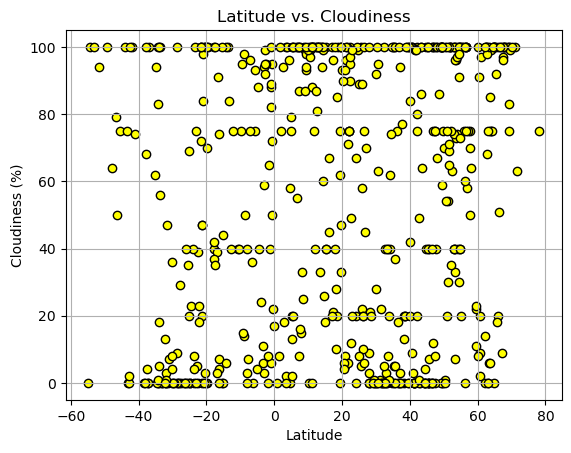

In [16]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness=city_data_df['Cloudiness']
plt.scatter(latitude,cloudiness,facecolor='yellow', edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

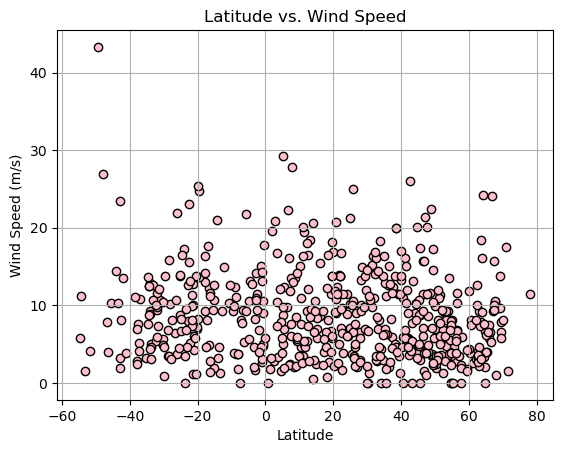

In [17]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
windspeed=city_data_df['Wind Speed']
plt.scatter(latitude,windspeed,facecolor='pink', edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,):
    print(f"The r-value is: {round(st.pearsonr(x, y)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The line equation is: {line_eq}")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zeya,53.7500,53.7500,53.22,63,96,3.22,RU,1693143758
3,hazard,37.2495,37.2495,76.69,87,94,5.88,US,1693143758
6,bratsk,56.1325,56.1325,59.49,91,75,2.84,RU,1693143760
7,jamestown,42.0970,42.0970,66.02,84,100,5.75,US,1693143760
8,petropavlovsk-kamchatsky,53.0452,53.0452,54.19,94,40,8.95,RU,1693143751


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kismayo,-0.3582,-0.3582,80.10,77,22,17.74,SO,1693143757
2,hithadhoo,-0.6000,-0.6000,83.14,72,95,4.72,MV,1693143758
4,grytviken,-54.2811,-54.2811,27.03,85,100,11.25,GS,1693143759
5,port mathurin,-19.6833,-19.6833,72.88,76,0,24.79,MU,1693143759
9,port-aux-francais,-49.3500,-49.3500,44.06,96,100,43.31,TF,1693143760


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.693
The line equation is: y = -0.54x + 92.68


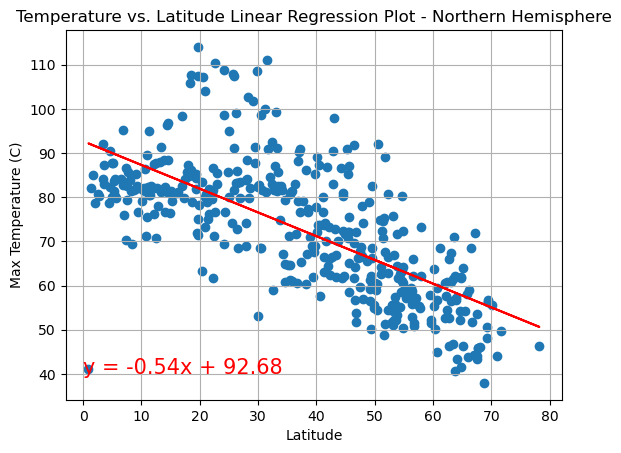

In [21]:
# Linear regression on Northern Hemisphere
linear_reg = linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
annotate(linear_reg,0,40)

# Incorporate the other graph properties
plt.title('Temperature vs. Latitude Linear Regression Plot - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

The r-value is: 0.829
The line equation is: y = 0.87x + 86.18


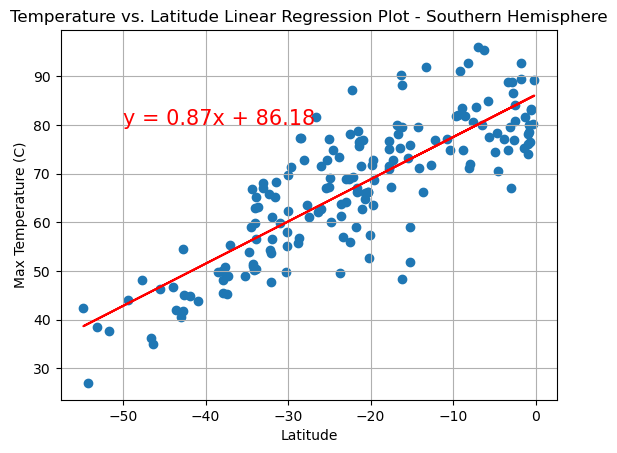

In [29]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Max Temp']
linear_reg = linear_regression(x,y)
annotate(linear_reg,-50,80)

# Incorporate the other graph properties
plt.title('Temperature vs. Latitude Linear Regression Plot - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** The x values represent the lattitude and y values represent the maximum temperature. In this case looking at the linear relationship between lattitude and temperature, it is understood that the temperature decreases as the lattitude increases in the northern hemisphere and decrease in the southern hemisphere. Meaning the temperature decreases as  we move further from the equator. The r values also suggests a moderately strong negative relationshp between the variables in the northern hemisphere and moderately strong positive relationshp between the variables in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.041
The line equation is: y = 0.05x + 66.48


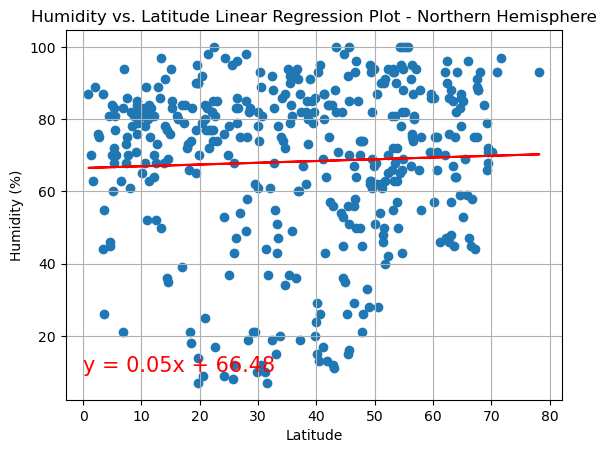

In [23]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']
linear_reg = linear_regression(x,y)
annotate(linear_reg,0,10)

# Incorporate the other graph properties
plt.title('Humidity vs. Latitude Linear Regression Plot - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig7.png")

The r-value is: 0.04
The line equation is: y = 0.07x + 65.69


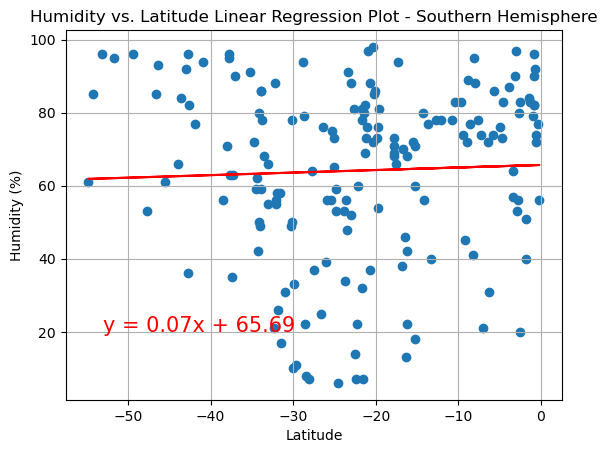

In [24]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']
linear_reg = linear_regression(x,y)
annotate(linear_reg,-53,20)

# Incorporate the other graph properties
plt.title('Humidity vs. Latitude Linear Regression Plot - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** The x values represent the lattitude and y values represent humidity. In this case looking at the linear relationship between lattitude and humidity, the y variable does not change significantly with the change in x variable, suggesting a weak dependancy. The r values also suggests a very weak negative relationshp between the variables in the northern hemisphere and southern hemisphere making it less suitable to predict the values of the dependant y variable solely based on the linear relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.048
The line equation is: y = 0.1x + 53.66


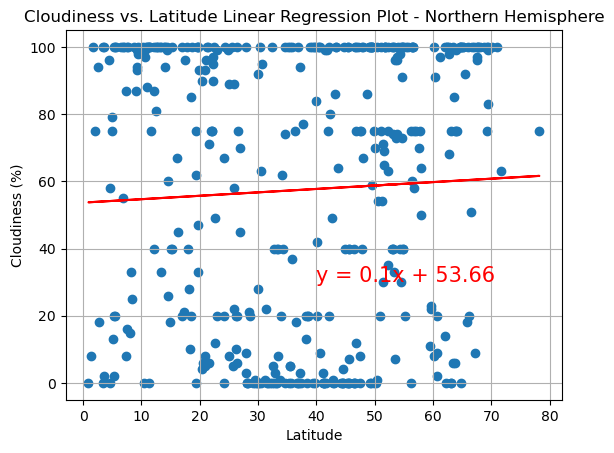

In [30]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']
linear_reg = linear_regression(x,y)
annotate(linear_reg,40,30)

# Incorporate the other graph properties
plt.title('Cloudiness vs. Latitude Linear Regression Plot - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig9.png")

The r-value is: 0.075
The line equation is: y = 0.22x + 47.74


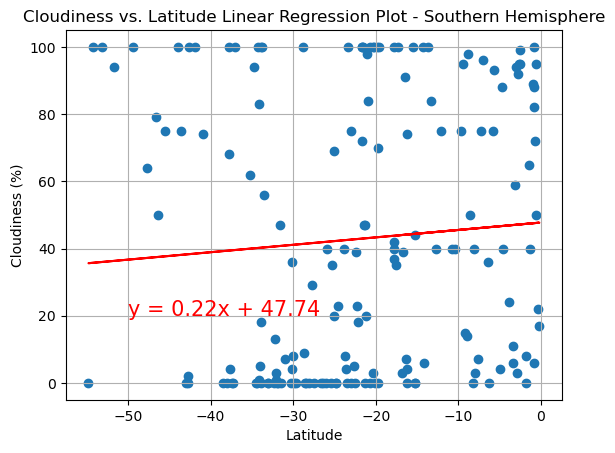

In [26]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']
linear_reg = linear_regression(x,y)
annotate(linear_reg,-50,20)

# Incorporate the other graph properties
plt.title('Cloudiness vs. Latitude Linear Regression Plot - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** The x values represent the lattitude and y values represent cloudiness. In this case looking at the linear relationship between lattitude and cloudiness in the northern hemisphere, the variables shows a very weak positive relation, where one variable increases with the other, suggesting that the cloudiness tends to increase as we move further from the equator. However, in the southern hemisphere, the negative coefficient suggests a negative relationship between the two variables. The r value also suggests a weak negative correlation. Meaning, the cloudiness tends to reduce as we move further to the equator from the southern pole and vise versa. 
**In this case the linear relationship model alone does not prove to be a reliable data to make predictions and analysis.**

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.149
The line equation is: y = -0.04x + 9.71


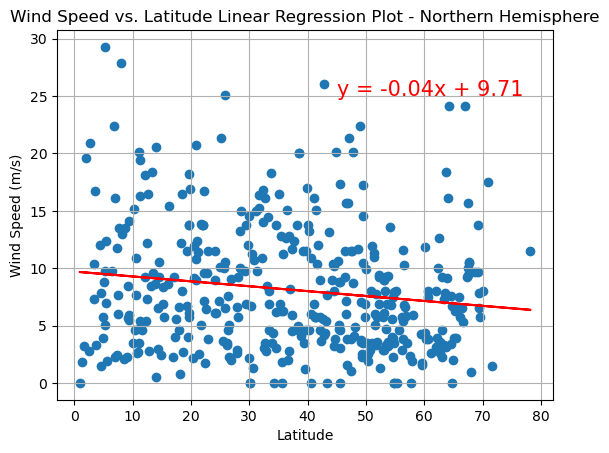

In [31]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']
linear_reg = linear_regression(x,y)
annotate(linear_reg,45,25)

# Incorporate the other graph properties
plt.title('Wind Speed vs. Latitude Linear Regression Plot - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig11.png")

The r-value is: -0.064
The line equation is: y = -0.03x + 8.45


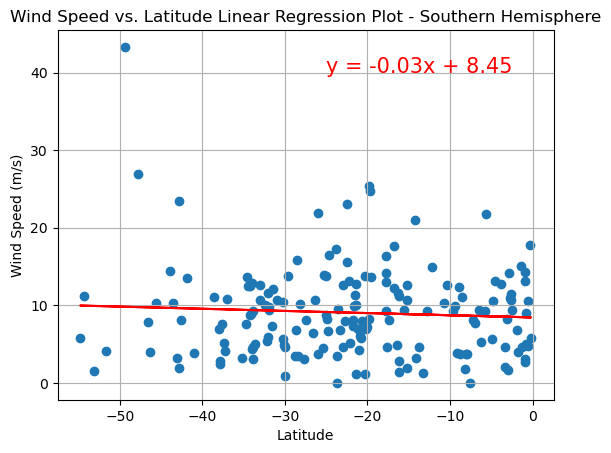

In [32]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']
linear_reg = linear_regression(x,y)
annotate(linear_reg,-25,40)

# Incorporate the other graph properties
plt.title('Wind Speed vs. Latitude Linear Regression Plot - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** The x values represent the lattitude and y values represent wind speed. In this case looking at the linear relationship between lattitude and windspeed, the negative coefficient suggest a negative correlation. However the y variable does not change significantly with the change in x variable, due to the very small value of the coefficient suggesting a very weak dependancy. The r values also suggests a very weak negative relationshp between the variables in the northern hemisphere and southern hemisphere making it negligible. It is also less suitable to predict the values of the dependant y variable solely based on the linear relationship. 